In [17]:
from IPython.display import clear_output
import SALib
clear_output()
print("Everything imported!")

Everything imported!


In [18]:
%matplotlib inline
from SALib.sample import saltelli
from model import CityModel
from agent import CarAgent
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm import tqdm
import pickle

In [19]:
problem = {
    'num_vars': 3,
    'names': ['max_car_agents', 'tolerance', 'green_light_duration'],
    'bounds': [[20, 200], [0, 1], [2,8]]
}

In [20]:
problem = {
    'num_vars': 3,
    'names': ['max_car_agents', 'tolerance', 'green_light_duration'],
    'bounds': [[20, 200], [0, 1], [2,8]]
}
model_reporters = {"average_congestion": lambda m: m.get_average_congestion()}

# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 20
max_steps = 300
distinct_samples = 500

# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples)

batch = BatchRunner(CityModel, 
                    max_steps=max_steps,
                    variable_parameters={name:[] for name in problem['names']},
                    model_reporters=model_reporters)

count = 0
# data = pd.DataFrame(index=range(replicates*len(param_values)), 
#                                 columns=problem['names'])
# data['Run'], data['average_congestion'] = None, None

# for i in range(replicates):
#     for vals in tqdm(param_values): 
#         # Change parameters that should be integers
#         vals = list(vals)
#         vals[0] = int(vals[0])
#         vals[1] = int(vals[1])
#         vals[2] = int(vals[2])
#         # Transform to dict with parameter names and their values
#         variable_parameters = {}
#         for name, val in zip(problem['names'], vals):
#             variable_parameters[name] = val

#         batch.run_iteration(variable_parameters, tuple(vals), count)
#         iteration_data = batch.get_model_vars_dataframe().iloc[count]
#         iteration_data['Run'] = count
        
#         data.iloc[count, 0:3] = vals
#         data.iloc[count, 3:6] = iteration_data
    
#         count += 1

#     data.to_csv(f'sa_data{i}_2_daan')

In [21]:
data.to_csv("dataDaanFinal.csv")

AttributeError: 'dict' object has no attribute 'to_csv'

In [10]:
data = pd.read_csv('day2/data_daan.csv')
Si_average_congestion = sobol.analyze(problem, data['average_congestion'].values, print_to_console=True)
print("hoi")
name = "si_average_cong_daan.p"
pickle.dump(Si_average_congestion, open(name, "wb"))

Parameter S1 S1_conf ST ST_conf
max_car_agents 0.026695 0.030701 0.894598 0.027802
tolerance 0.015023 0.029641 0.937220 0.030874
green_light_duration 0.021291 0.025528 0.954269 0.035263

Parameter_1 Parameter_2 S2 S2_conf
max_car_agents tolerance 0.008970 0.042716
max_car_agents green_light_duration 0.009761 0.043078
tolerance green_light_duration 0.000351 0.040613
hoi


In [11]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

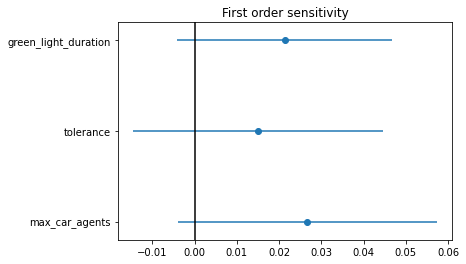

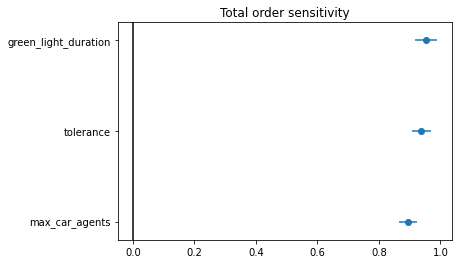

In [12]:
# First order
plot_index(Si_average_congestion, problem['names'], '1', 'First order sensitivity')
plt.show()

# Total order
plot_index(Si_average_congestion, problem['names'], 'T', 'Total order sensitivity')
plt.show()

In [16]:
data = {}

for i, var in enumerate(problem['names']):
    # Get the bounds for this variable and get <distinct_samples> samples within this space (uniform)
    samples = np.linspace(*problem['bounds'][i], num=distinct_samples)
    
    # Keep in mind that wolf_gain_from_food should be integers. You will have to change
    # your code to acommodate for this or sample in such a way that you only get integers.
    if var in ['max_car_agents', 'max_velocity', 'green_light_duration']:
        samples = np.linspace(*problem['bounds'][i], num=distinct_samples, dtype=int)
    
    batch = BatchRunner(CityModel, 
                        max_steps=max_steps,
                        iterations=replicates,
                        variable_parameters={var: samples},
                        model_reporters=model_reporters,
                        display_progress=True)
    
    batch.run_all()
    
    data[var] = batch.get_model_vars_dataframe()

name = "batch_daan.p"
pickle.dump(Si_average_congestion, open(name, "wb"))

10000it [7:05:22,  2.55s/it]
10000it [7:42:18,  2.77s/it]
10000it [7:48:43,  2.81s/it]


In [22]:
print(data)
name = "batch_daan_Data_goede.p"
pickle.dump(data, open(name, "wb"))

{'max_car_agents':       max_car_agents   Run  average_congestion
0                 20     0           55.332361
1                 20     1           53.709425
2                 20     2           44.137350
3                 20     3           46.651603
4                 20     4           48.184309
...              ...   ...                 ...
9995             200  9995           89.456349
9996             200  9996           60.754021
9997             200  9997           90.329109
9998             200  9998           62.091671
9999             200  9999           58.127562

[10000 rows x 3 columns], 'tolerance':       tolerance   Run  average_congestion
0           0.0     0           52.373002
1           0.0     1           51.402023
2           0.0     2           49.250995
3           0.0     3           51.307563
4           0.0     4           53.346953
...         ...   ...                 ...
9995        1.0  9995           55.923704
9996        1.0  9996           53.334662

In [ ]:
def plot_param_var_conf(ax, df, var, param, i):
    """
    Helper function for plot_all_vars. Plots the individual parameter vs
    variables passed.

    Args:
        ax: the axis to plot to
        df: dataframe that holds the data to be plotted
        var: variables to be taken from the dataframe
        param: which output variable to plot
    """
    x = df.groupby(var).mean().reset_index()[var]
    y = df.groupby(var).mean()[param]

    replicates = df.groupby(var)[param].count()
    err = (1.96 * df.groupby(var)[param].std()) / np.sqrt(replicates)

    ax.plot(x, y, c='k')
    ax.fill_between(x, y - err, y + err)

    ax.set_xlabel(var)
    ax.set_ylabel(param)

def plot_all_vars(df, param):
    """
    Plots the parameters passed vs each of the output variables.

    Args:
        df: dataframe that holds all data
        param: the parameter to be plotted
    """

    f, axs = plt.subplots(4, figsize=(7, 10))
    
    for i, var in enumerate(problem['names']):
        plot_param_var_conf(axs[i], data[var], var, param, i)


plot_all_vars(data, 'average_congestion')
plt.show()